In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [2]:
train=pd.read_csv('oil_train_data.csv')

In [3]:
test=pd.read_csv('oil_test_data.csv')

In [4]:
print(train.shape)
print(test.shape)

(813, 2)
(16, 2)


## Exploratory Data Analysis

In [5]:
df=pd.concat([train,test])

In [6]:
df.head()

,Date,Petrol (USD),Prediction
0,6/9/2003,74.59,NaN
1,6/16/2003,74.47,NaN
2,6/23/2003,74.42,NaN
3,6/30/2003,74.35,NaN
4,7/7/2003,74.28,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 829 entries, 0 to 15
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          829 non-null    object 
 1   Petrol (USD)  811 non-null    float64
 2   Prediction    0 non-null      float64
dtypes: float64(2), object(1)
memory usage: 25.9+ KB


#### Converting dtype of Date from object to datetime

In [8]:
df.Date=pd.to_datetime(df.Date)

In [9]:
df['Year']=df.Date.dt.year

In [10]:
df['Month']=df.Date.dt.month
df['Day']=df.Date.dt.day

In [11]:
df.head()

,Date,Petrol (USD),Prediction,Year,Month,Day
0,2003-06-09,74.59,NaN,2003,6,9
1,2003-06-16,74.47,NaN,2003,6,16
2,2003-06-23,74.42,NaN,2003,6,23
3,2003-06-30,74.35,NaN,2003,6,30
4,2003-07-07,74.28,NaN,2003,7,7


In [12]:
df.tail()

,Date,Petrol (USD),Prediction,Year,Month,Day
11,2019-01-12,NaN,NaN,2019,1,12
12,2020-01-01,NaN,NaN,2020,1,1
13,2020-01-02,NaN,NaN,2020,1,2
14,2020-01-03,NaN,NaN,2020,1,3
15,2020-01-04,NaN,NaN,2020,1,4


In [13]:
df.shape

(829, 6)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 829 entries, 0 to 15
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          829 non-null    datetime64[ns]
 1   Petrol (USD)  811 non-null    float64       
 2   Prediction    0 non-null      float64       
 3   Year          829 non-null    int64         
 4   Month         829 non-null    int64         
 5   Day           829 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 45.3 KB


In [15]:
df.isna().sum()

Date              0
Petrol (USD)     18
Prediction      829
Year              0
Month             0
Day               0
dtype: int64

In [16]:
df['Petrol (USD)'].mean()

110.3304808877927

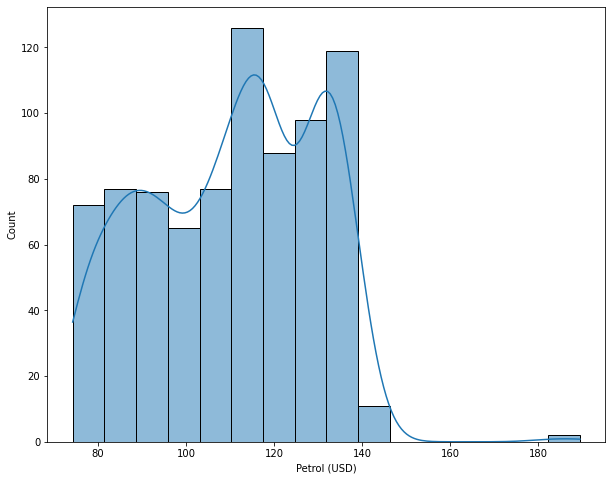

In [17]:
plt.figure(figsize=(10,8))
sns.histplot(df['Petrol (USD)'],kde=True);

#### Filling NaN values

In [18]:
df['Petrol (USD)'].fillna(df['Petrol (USD)'].mean(),inplace=True)

In [19]:
df.isna().sum()

Date              0
Petrol (USD)      0
Prediction      829
Year              0
Month             0
Day               0
dtype: int64

In [20]:
df=df.drop('Date',axis=1)

In [21]:
df.head()

,Petrol (USD),Prediction,Year,Month,Day
0,74.59,NaN,2003,6,9
1,74.47,NaN,2003,6,16
2,74.42,NaN,2003,6,23
3,74.35,NaN,2003,6,30
4,74.28,NaN,2003,7,7


In [22]:
df.describe()

,Petrol (USD),Prediction,Year,Month,Day
count,829.000000,0.0,829.000000,829.000000,829.000000
mean,110.330481,NaN,2010.874548,6.504222,15.577805
std,19.030890,NaN,4.613694,3.497970,8.851447
min,74.210000,NaN,2003.000000,1.000000,1.000000
25%,94.830000,NaN,2007.000000,3.000000,8.000000
50%,111.910000,NaN,2011.000000,7.000000,15.000000
75%,128.350000,NaN,2015.000000,10.000000,23.000000
max,189.510000,NaN,2020.000000,12.000000,31.000000


#### Splitting data into train and test data

In [23]:
train=df.iloc[:813,:]

In [24]:
test=df.iloc[813:,:]

In [25]:
train=train.drop('Prediction',axis=1)

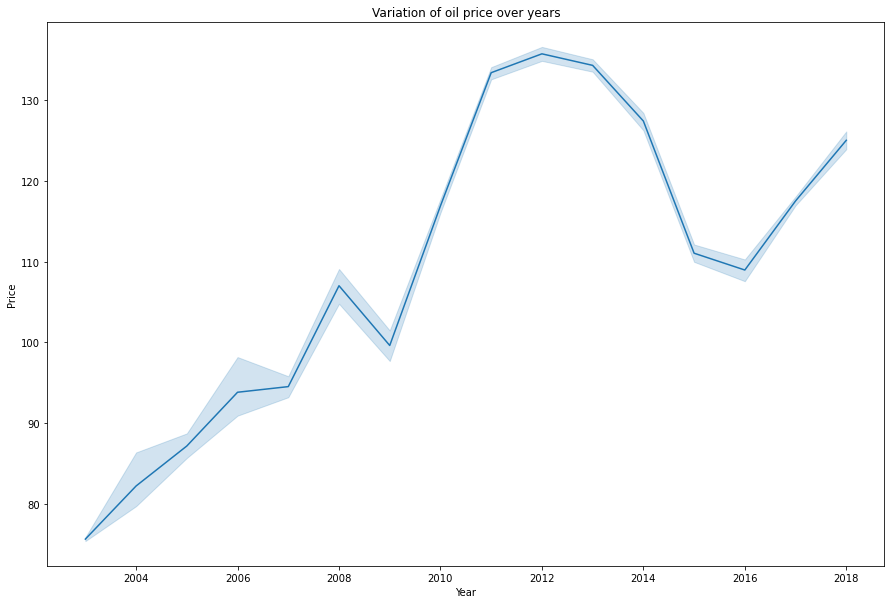

In [26]:
plt.figure(figsize=(15,10))
sns.lineplot(x=train.Year,y=train['Petrol (USD)'])
plt.title('Variation of oil price over years')
plt.xlabel('Year')
plt.ylabel('Price');

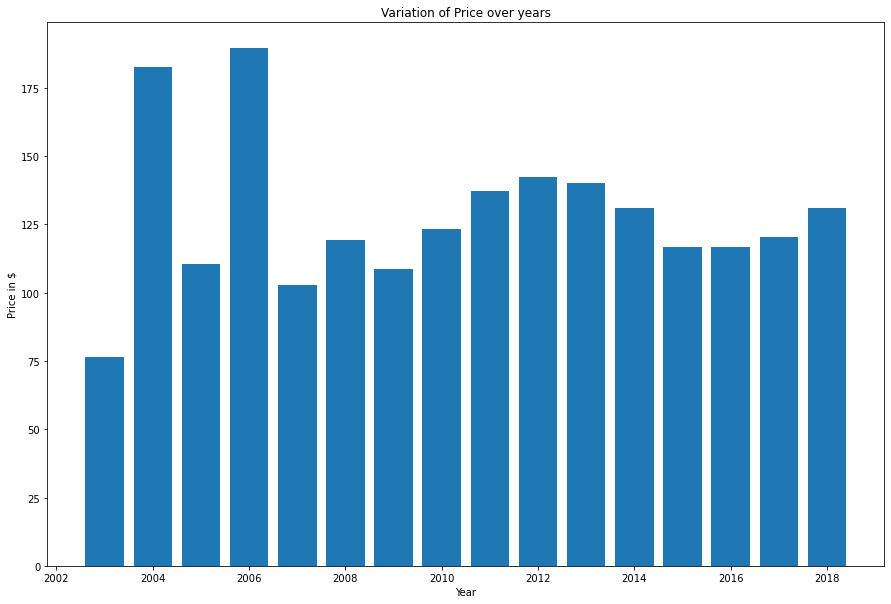

In [27]:
plt.figure(figsize=(15,10))
x=train['Year']
y=train['Petrol (USD)']
plt.bar(x,y)
plt.title('Variation of Price over years')
plt.xlabel('Year')
plt.ylabel('Price in $');

In [28]:
test=test.drop('Petrol (USD)',axis=1)

In [29]:
X=train.drop('Petrol (USD)',axis=1)
y=train['Petrol (USD)']

## Model Building and Analysis

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
lr_model=LinearRegression()

In [33]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [34]:
y_lr_pred=lr_model.predict(X_test)

In [35]:
print(r2_score(y_test,y_lr_pred))

0.5179925579873279


In [36]:
rf_model=RandomForestRegressor(n_estimators=150,max_depth=6)

In [37]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=6, n_estimators=150)

In [38]:
y_rf_pred=rf_model.predict(X_test)

In [39]:
print(r2_score(y_test,y_rf_pred))

0.9559074653850202


In [40]:
mean_absolute_error(y_test,y_rf_pred)

1.9726706628366113

In [41]:
np.sqrt(mean_squared_error(y_test,y_rf_pred))

3.9991237621117373

C:\Users\Shridatta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Petrol (USD)', ylabel='Density'>

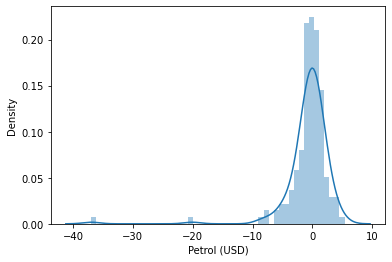

In [42]:
sns.distplot(y_test-y_rf_pred)

<AxesSubplot:xlabel='Petrol (USD)'>

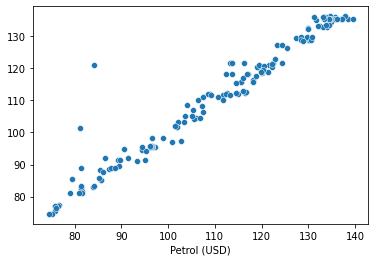

In [43]:
sns.scatterplot(x=y_test,y=y_rf_pred)

#### Prediction with test data

In [52]:
tf=test.drop('Prediction',axis=1)

In [106]:
tf.head()

,Year,Month,Day
0,2019,1,1
1,2019,1,2
2,2019,1,3
3,2019,1,4
4,2019,1,5


In [54]:
rf_model.predict(tf)

array([120.59395486, 120.59395486, 120.59395486, 120.74368632,
       120.74368632, 120.74368632, 120.75256632, 120.78025965,
       120.83871803, 120.83871803, 120.99822389, 120.99822389,
       120.59395486, 120.59395486, 120.59395486, 120.74368632])

In [56]:
tf.loc[0]

Year     2019
Month       1
Day         1
Name: 0, dtype: int64

In [109]:
import pickle

In [110]:
pickle.dump(rf_model,open('rf_petrol_model.pkl','wb'))

In [111]:
 pickle_model=pickle.load(open('rf_petrol_model.pkl','rb'))
